**Downlaod and extract data**

In [1]:
! wget -O A.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
! wget -O B.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
! wget -O C.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip
! wget -O D.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip
! wget -O E.zip http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip

--2021-04-18 14:36:47--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘A.zip’

A.zip               100%[===================>] 564.50K   361KB/s    in 1.6s    

2021-04-18 14:36:50 (361 KB/s) - ‘A.zip’ saved [578047/578047]

--2021-04-18 14:36:50--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘B.zip’

B.zip               100%[===================>] 611.30K   382KB/s    in 1.6s    

2021-04-18 14:36:52 (382 KB/s) - ‘B.zip’ saved [62

In [2]:
! mkdir A B C D E

In [3]:
! unzip /content/A.zip -d A
! unzip /content/B.zip -d B
! unzip /content/C.zip -d C
! unzip /content/D.zip -d D
! unzip /content/E.zip -d E
! rm -rf /content/A.zip
! rm -rf /content/B.zip
! rm -rf /content/D.zip
! rm -rf /content/C.zip
! rm -rf /content/E.zip

Archive:  /content/A.zip
  inflating: A/Z092.txt              
  inflating: A/Z002.txt              
  inflating: A/Z003.txt              
  inflating: A/Z004.txt              
  inflating: A/Z005.txt              
  inflating: A/Z006.txt              
  inflating: A/Z007.txt              
  inflating: A/Z008.txt              
  inflating: A/Z009.txt              
  inflating: A/Z010.txt              
  inflating: A/Z011.txt              
  inflating: A/Z012.txt              
  inflating: A/Z013.txt              
  inflating: A/Z014.txt              
  inflating: A/Z015.txt              
  inflating: A/Z016.txt              
  inflating: A/Z017.txt              
  inflating: A/Z018.txt              
  inflating: A/Z019.txt              
  inflating: A/Z020.txt              
  inflating: A/Z021.txt              
  inflating: A/Z022.txt              
  inflating: A/Z023.txt              
  inflating: A/Z024.txt              
  inflating: A/Z025.txt              
  inflating: A/Z026.txt  

In [4]:
!ls

A  B  C  D  E  sample_data


**Load and preprocess data**

In [5]:
import os

root = "/content/"
files = os.listdir()

A_path = os.path.join(root, [elem for elem in files if elem=='A'][0])
B_path = os.path.join(root, [elem for elem in files if elem=='B'][0])
C_path = os.path.join(root, [elem for elem in files if elem=='C'][0])
D_path = os.path.join(root, [elem for elem in files if elem=='D'][0])
E_path = os.path.join(root, [elem for elem in files if elem=='E'][0])

print(A_path)
print(B_path)
print(C_path)
print(D_path)
print(E_path)

/content/A
/content/B
/content/C
/content/D
/content/E


**SET A**

In [6]:
import numpy as np
from scipy.signal import butter, filtfilt


pass_band = [0.5*2/173, 40*2/173]
b, a = butter(1, pass_band, 'bandpass')

A_files = [os.path.join(A_path, path) for path in os.listdir(A_path)]

A_signals = []

for signal in A_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  A_signals.append(signal)

A_signals = np.array(A_signals)

**SET B**

In [7]:
B_files = [os.path.join(B_path, path) for path in os.listdir(B_path)]

B_signals = []

for signal in B_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  B_signals.append(signal)

B_signals = np.array(B_signals)

**SET C**

In [8]:
C_files = [os.path.join(C_path, path) for path in os.listdir(C_path)]

C_signals = []


for signal in C_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  C_signals.append(signal)

C_signals = np.array(C_signals)

**SET D**

In [9]:
D_files = [os.path.join(D_path, path) for path in os.listdir(D_path)]

D_signals = []

for signal in D_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  D_signals.append(signal)

D_signals = np.array(D_signals)

**SET E**

In [10]:
E_files = [os.path.join(E_path, path) for path in os.listdir(E_path)]

E_signals = []

for signal in E_files:
  signal = np.loadtxt(signal)
  signal = filtfilt(b, a, signal)
  E_signals.append(signal)

E_signals = np.array(E_signals)

**Prepare datasets for train**

In [11]:
print(A_signals.shape)
print(B_signals.shape)
print(C_signals.shape)
print(D_signals.shape)
print(E_signals.shape)

(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)
(100, 4097)


**CASE 1**

In [12]:
# Construct the sets we want to train on here
# Case 1

A_labels = np.zeros(len(A_signals))
E_labels = np.ones(len(E_signals))

X = np.concatenate((A_signals, E_signals), axis=0)
Y = np.concatenate((A_labels, E_labels), axis=0)

print(X.shape)
print(Y.shape)

(200, 4097)
(200,)


**CASE 2**

In [13]:
# Case 2

B_labels = np.zeros(len(B_signals))
E_labels = np.ones(len(E_signals))

X = np.concatenate((B_signals, E_signals), axis=0)
Y = np.concatenate((B_labels, E_labels), axis=0)

print(X.shape)
print(Y.shape)

(200, 4097)
(200,)


**CASE 3**

In [14]:
# Case 3

C_labels = np.zeros(len(C_signals))
E_labels = np.ones(len(E_signals))

X = np.concatenate((C_signals, E_signals), axis=0)
Y = np.concatenate((C_labels, E_labels), axis=0)

print(X.shape)
print(Y.shape)

(200, 4097)
(200,)


**CASE 4**

In [15]:
# Case 4

D_labels = np.zeros(len(D_signals))
E_labels = np.ones(len(E_signals))

X = np.concatenate((D_signals, E_signals), axis=0)
Y = np.concatenate((D_labels, E_labels), axis=0)

print(X.shape)
print(Y.shape)

(200, 4097)
(200,)


**CASE 5**

In [16]:
# Case 5


A_labels = np.zeros(len(A_signals))
B_labels = np.zeros(len(B_signals))
C_labels = np.zeros(len(C_signals))
D_labels = np.zeros(len(D_signals))

E_labels = np.ones(len(E_signals))

X = np.concatenate((A_signals, B_signals, C_signals, D_signals, E_signals), axis=0)
Y = np.concatenate((A_labels, B_labels, C_labels, D_labels, E_labels), axis=0)

print(X.shape)
print(Y.shape)

(500, 4097)
(500,)


**Visualization**

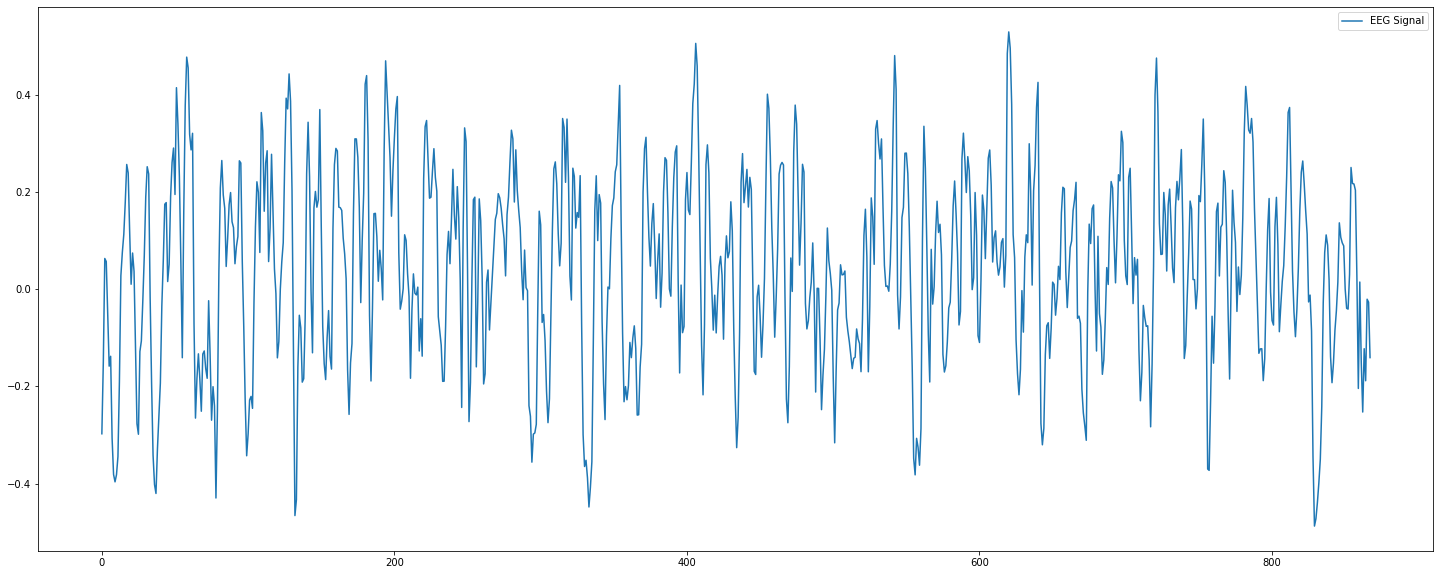

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.plot(X[0], label = 'EEG Signal')
plt.legend()

In [18]:
X = X[:, 0:868].reshape(-1, 868, 1)
print(X.shape)
print(Y.shape)

(500, 868, 1)
(500,)


**Normalization**

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, 868)).reshape(-1, 868, 1)
print(X.shape)

(500, 868, 1)


**Define Model Architecture**

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 868, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 868, 32)           256       
_________________________________________________________________
activation (Activation)      (None, 868, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 217, 32)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 217, 32)           128       
_________________________________________________________________
dropout (Dropout)            (None, 217, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 217, 32)           7200  

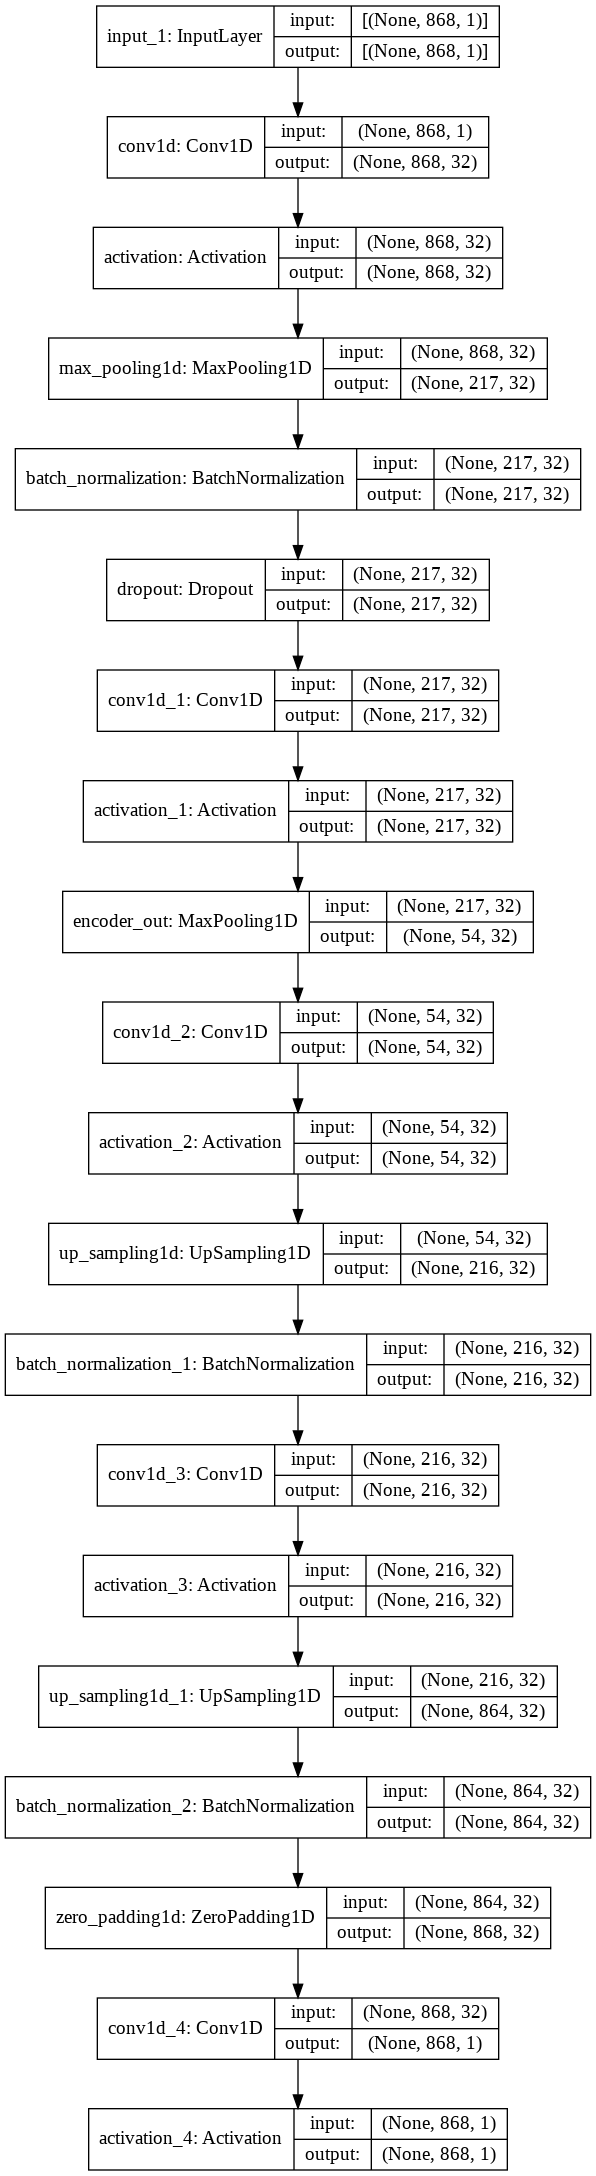

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, UpSampling1D, Activation
from tensorflow.keras.layers import ZeroPadding1D
from tensorflow.keras.models import Model
from keras.utils import plot_model


inputs = Input(shape=(868, 1))
# ENCODER
# part 1
x = Conv1D(32, 7, padding='same', strides=1)(inputs)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)
x = Dropout(0.5)(x)
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=4, name='encoder_out')(x)

# DECODER
# part 2
x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = Conv1D(32, 7, padding='same', strides=1)(x)
x = Activation('relu')(x)
x = UpSampling1D(4)(x)
x = BatchNormalization(axis=-1, momentum=0.99)(x)

x = ZeroPadding1D(padding=2)(x)
x = Conv1D(1, 7, padding='same', strides=1)(x)
x = Activation('tanh')(x)

model= Model(inputs, x)

print(model.summary())
plot_model(model, show_shapes=True)

**Split dataset into train and test**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42,
                                                    shuffle=True, stratify=Y)
print(X_train.shape)
print(X_test.shape)

(450, 868, 1)
(50, 868, 1)


**train the model**

In [23]:
# adadelta for autoencoder

model.compile(loss='mse',
              optimizer='adadelta')
history = model.fit(X_train, X_train, validation_data=(X_test, X_test),
                    epochs=2000, batch_size=16)

Epoch 1/2000
29/29 [==============================] - 4s 26ms/step - loss: 0.0967 - val_loss: 0.0739
Epoch 2/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0996 - val_loss: 0.0742
Epoch 3/2000
29/29 [==============================] - 0s 17ms/step - loss: 0.0931 - val_loss: 0.0734
Epoch 4/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0912 - val_loss: 0.0735
Epoch 5/2000
29/29 [==============================] - 0s 17ms/step - loss: 0.0932 - val_loss: 0.0736
Epoch 6/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0917 - val_loss: 0.0733
Epoch 7/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0936 - val_loss: 0.0734
Epoch 8/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0974 - val_loss: 0.0730
Epoch 9/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0983 - val_loss: 0.0734
Epoch 10/2000
29/29 [==============================] - 0s 16ms/step - loss: 0.0966 - val_lo

**Evaluation**

In [24]:
model.evaluate(X_test, X_test)

2/2 [==============================] - 0s 172ms/step - loss: 0.0350


0.03495281562209129

**Training and Testing Curves**

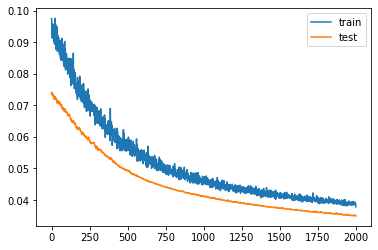

In [25]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**Signal Reconstruction**

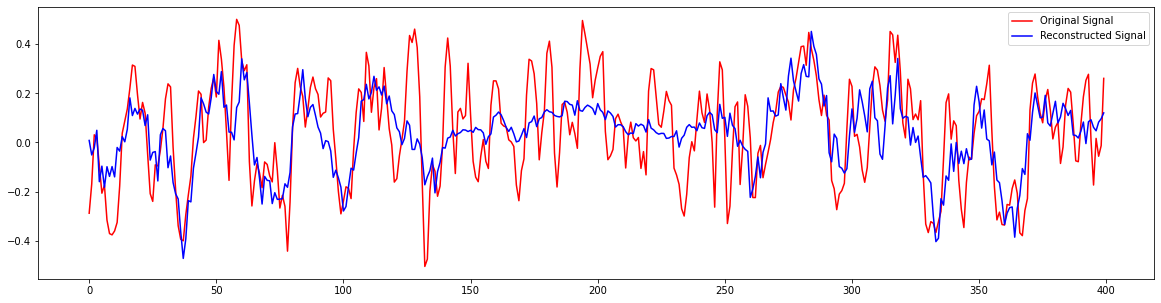

In [34]:
# plot created model output vs signal
import numpy as np

preds = model.predict(X_test)
plt.figure(figsize=(20, 5))
plt.plot(X_test[0][0:400], color='red', label = 'Original Signal')
# plt.figure(figsize=(20, 5))
plt.plot(preds[0][0:400], color='blue', label = 'Reconstructed Signal')
plt.legend() 


**classification**

In [27]:
# classification model creation
# encoder only model.

clf_in = model.input
clf_out = [layer.output for layer in model.layers if layer.name == 'encoder_out'][0]
clf_x = Flatten()(clf_out)
clf_x = Dense(1, activation='sigmoid')(clf_x)
clf = tf.keras.models.Model(inputs=clf_in,
                            outputs=clf_x)
print(clf.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 868, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 868, 32)           256       
_________________________________________________________________
activation (Activation)      (None, 868, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 217, 32)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 217, 32)           128       
_________________________________________________________________
dropout (Dropout)            (None, 217, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 217, 32)           7200

In [28]:
# sgd for classification

clf.compile(loss='binary_crossentropy',
            optimizer='sgd', metrics=['accuracy'])
history = clf.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                  epochs=50, batch_size=16)

Epoch 1/50
29/29 [==============================] - 1s 14ms/step - loss: 1.0234 - accuracy: 0.7625 - val_loss: 0.3340 - val_accuracy: 0.9200
Epoch 2/50
29/29 [==============================] - 0s 7ms/step - loss: 0.1522 - accuracy: 0.9466 - val_loss: 0.2677 - val_accuracy: 0.9400
Epoch 3/50
29/29 [==============================] - 0s 7ms/step - loss: 0.1783 - accuracy: 0.9420 - val_loss: 0.5928 - val_accuracy: 0.8800
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 0.2262 - accuracy: 0.9331 - val_loss: 0.2179 - val_accuracy: 0.9600
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0763 - accuracy: 0.9733 - val_loss: 0.2071 - val_accuracy: 0.9600
Epoch 6/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0915 - accuracy: 0.9643 - val_loss: 0.2240 - val_accuracy: 0.9600
Epoch 7/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0660 - accuracy: 0.9799 - val_loss: 0.1822 - val_accuracy: 0.9600
Epoch 8/50
29/29 [=

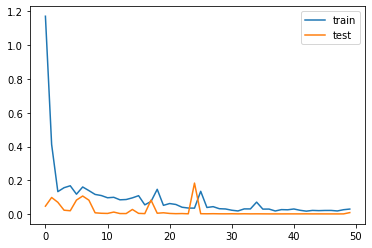

In [ ]:
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**Calculate Metrics**

In [29]:
from sklearn.metrics import classification_report 


preds = np.around(clf.predict(X_test))
rep = classification_report(Y_test, preds)
print(rep)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        40
         1.0       1.00      0.80      0.89        10

    accuracy                           0.96        50
   macro avg       0.98      0.90      0.93        50
weighted avg       0.96      0.96      0.96        50

